In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading and Preprocessing

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
print("First element of X_train is:",X_train[0])

First element of X_train is: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 2

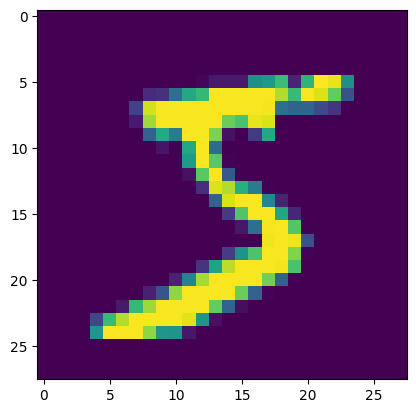

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
print ('The first element of y_train is: ', y_train[0])
print ('The last element of y_train is: ', y_train[-1])
print ('The first element of y_test is: ', y_test[0])
print ('The last element of y_test is: ', y_test[-1])

The first element of y_train is:  5
The last element of y_train is:  8
The first element of y_test is:  7
The last element of y_test is:  6


In [7]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))

The shape of X_train is: (60000, 28, 28)
The shape of y_train is: (60000,)


In [8]:
print ('The shape of X_test is: ' + str(X_test.shape))
print ('The shape of y_test is: ' + str(y_test.shape))

The shape of X_test is: (10000, 28, 28)
The shape of y_test is: (10000,)


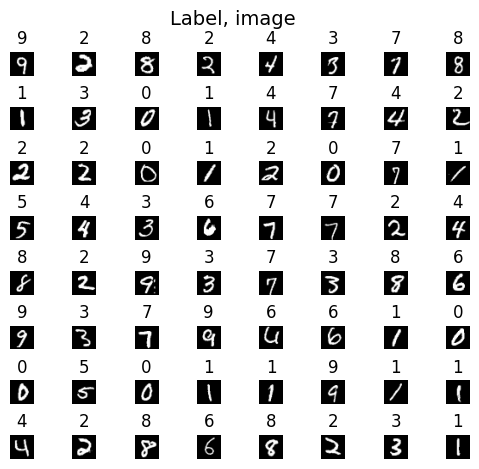

In [9]:
m, n , o = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]


for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    X_random = X_train[random_index]

    # Display the image
    ax.imshow(X_random, cmap='gray')

    # Display the label above the image
    ax.set_title(y_train[random_index])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

# Scaling the data
The pixel values of the images are scaled to the range [0, 1] by dividing by 255, which is the maximum value of a pixel. This normalization helps the neural network to train faster and perform better.

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Building the Model

In [12]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Flatten(input_shape=(28,28))) #Converts the 2D image (28x28 pixels) into a 1D array of 784 elements
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 10, activation='softmax')) #multiclass
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,validation_split=0.2,epochs=25)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 14s 8ms/step - loss: 0.4409 - accuracy: 0.8697 - val_loss: 0.1544 - val_accuracy: 0.9569
Epoch 2/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1982 - accuracy: 0.9480 - val_loss: 0.1314 - val_accuracy: 0.9642
Epoch 3/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1556 - accuracy: 0.9595 - val_loss: 0.1124 - val_accuracy: 0.9684
Epoch 4/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1284 - accuracy: 0.9665 - val_loss: 0.1053 - val_accuracy: 0.9724
Epoch 5/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1112 - accuracy: 0.9701 - val_loss: 0.0982 - val_accuracy: 0.9746
Epoch 6/25
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0986 - accuracy: 0.9731 - val_loss: 0.0983 - val_accuracy: 0.9738
Epoch 7/25
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0878 - accuracy: 0.9765 - val_loss: 0.1084 - val_accuracy: 0.

In [15]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [16]:
y_prob_train = model.predict(X_train)
y_pred_train = y_prob_train.argmax(axis=1)
y_pred_train

1875/1875 [==============================] - 4s 2ms/step


array([5, 0, 4, ..., 5, 6, 8])

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,y_pred_train)
print(f"Train accuracy: {accuracy:.4f}")
accuracy = accuracy_score(y_test,y_pred)
print(f"Test accuracy: {accuracy:.4f}")
#Train accuracy: 0.9945
#Test accuracy: 0.9827

Train accuracy: 0.9942
Test accuracy: 0.9821


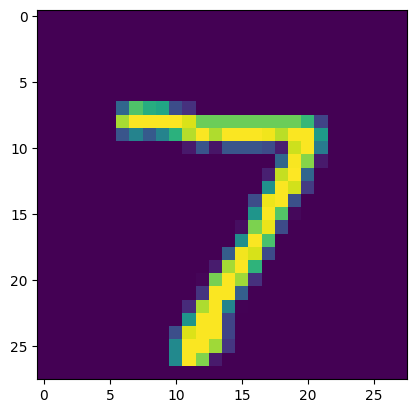

In [18]:
plt.imshow(X_test[0])

In [19]:
X_test[0].shape

(28, 28)

In [20]:
model.predict(X_test[0].reshape(1,28,28)).argmax()

1/1 [==============================] - 0s 35ms/step


7

# Plotting Training and Validation Loss and Accuracy

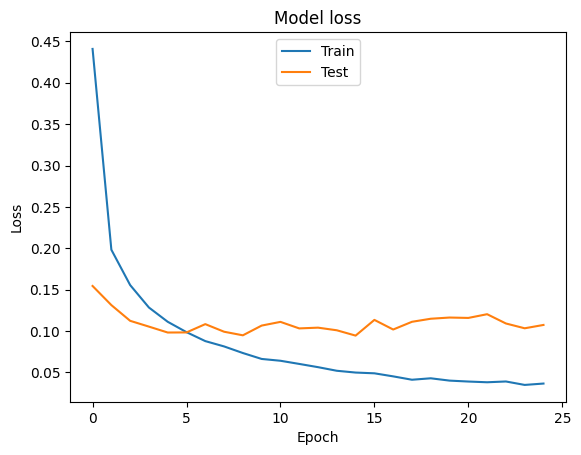

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc=9)
plt.show()

Loss Plot:
*   Train Loss: The blue line represents the loss of the model on the training data, decreasing over epochs. This indicates the model is learning to make better predictions on the training set.
*   Test Loss: The orange line shows the loss on the validation data, which is unseen by the model during training. The test loss also decreases initially but plateaus around epoch 5, indicating the model may be overfitting to the training data.



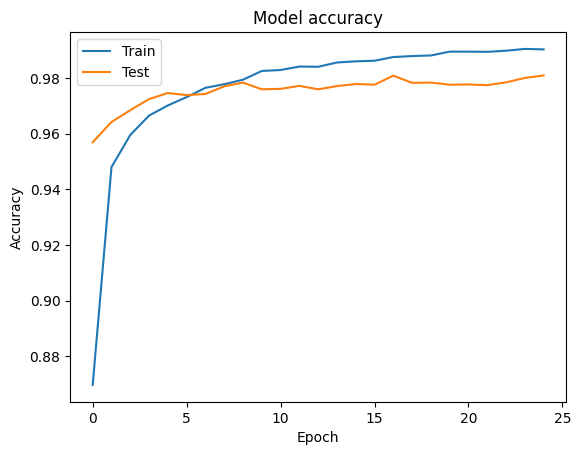

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


 Accuracy Plot:
*  Train Accuracy: The blue line represents the model's accuracy on the training data. It steadily increases, suggesting the model is becoming better at classifying digits in the training set.
*   Test Accuracy: The orange line shows the accuracy on the validation set. It also increases, but at a slower rate than the training accuracy. This again highlights potential overfitting, as the model is not generalizing as well to unseen data.



#  Visualizing Predictions

1/1 [==============================] - 0s 20ms/step


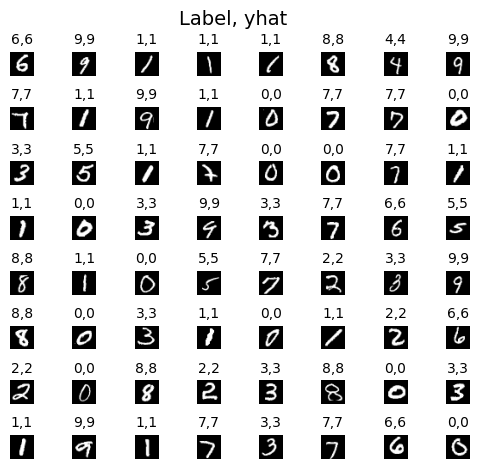

In [23]:
m, n, o = X_test.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    X_random = X_test[random_index]

    # Display the image
    ax.imshow(X_random, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X_test[random_index].reshape(1,28,28))
    yhat = prediction.argmax() #prediction_p = tf.nn.softmax(prediction) #yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{y_test[random_index]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [24]:
count = 0
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        count += 1
print(f"{count} errors out of {len(y_test)} images")
print(f"Accuracy: {1 - count/len(y_test)}")

179 errors out of 10000 images
Accuracy: 0.9821
